## Sim Demo

### Imports

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from env.imports import *

In [22]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)


<module 'data.data_utils' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_utils.py'>

#### Check job specs

In [23]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 2.4%
RAM Usage: 8.2%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [24]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.06 GB


In [25]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |


In [26]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

In [25]:
torch._dynamo.reset()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: lzh9zha7
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/lzh9zha7
Initialized sweep with ID: lzh9zha7
2
3
4
BEST CONFIG {'input_dim': 14760, 'n_components': 128, 'd_model': 64, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [256, 128], 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'weight_decay': 1e-05, 'batch_size': 1024, 'aug_prob': 0.3, 'epochs': 10, 'num_workers': 2, 'prefetch_factor': 4}
Fitting PCA on shape: torch.Size([341, 7380])


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.19 GB
Best val loss so far at epoch 1: 0.0407
Best val loss so far at epoch 2: 0.0308
Best val loss so far at epoch 3: 0.0264
Best val loss so far at epoch 4: 0.0239
Best val loss so far at epoch 5: 0.0215
Epoch 5/10, Train Loss: 0.0478, Val Loss: 0.0215, Time: 5.69s
Best val loss so far at epoch 6: 0.0202
Best val loss so far at epoch 7: 0.0187
Best val loss so far at epoch 8: 0.0181
Best val loss so far at epoch 9: 0.0172
Best val loss so far at epoch 10: 0.0166

Reached final epoch 10. Restoring best model with Val Loss: 0.0166, Pearson Correlation: 0.7021
Running train evaluation...

=== TRAIN EVALUATION ===
Evaluating 341 regions, 115940 connections


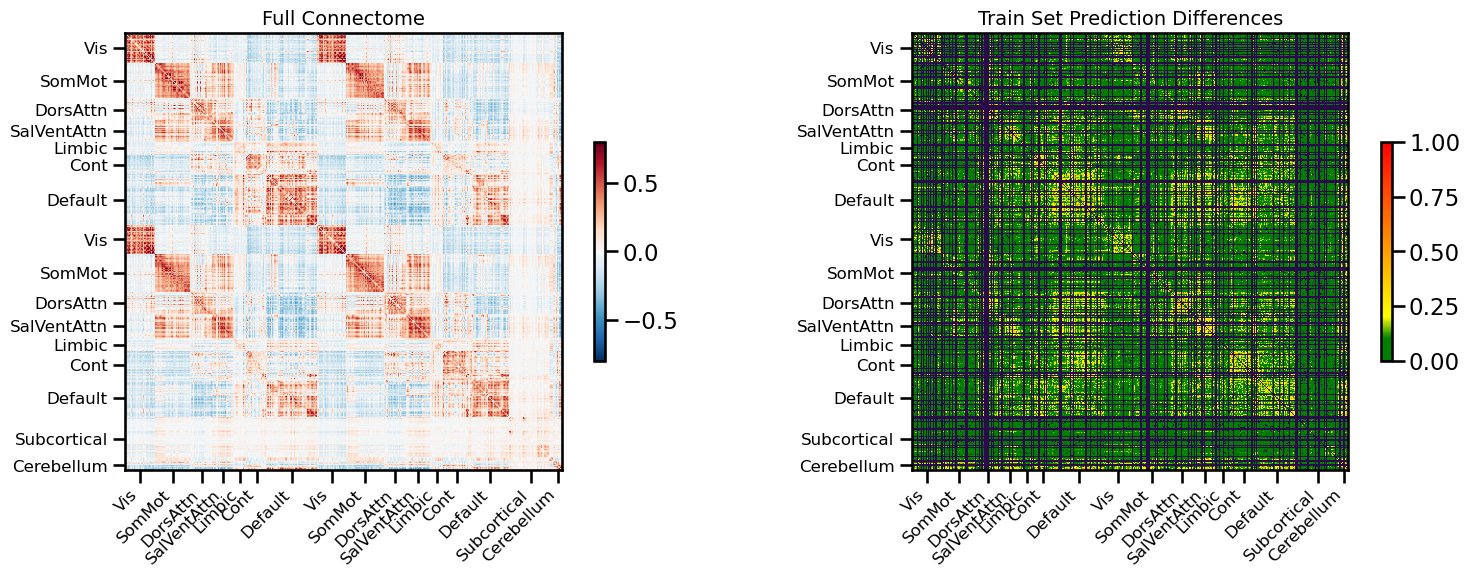

<Figure size 640x480 with 0 Axes>

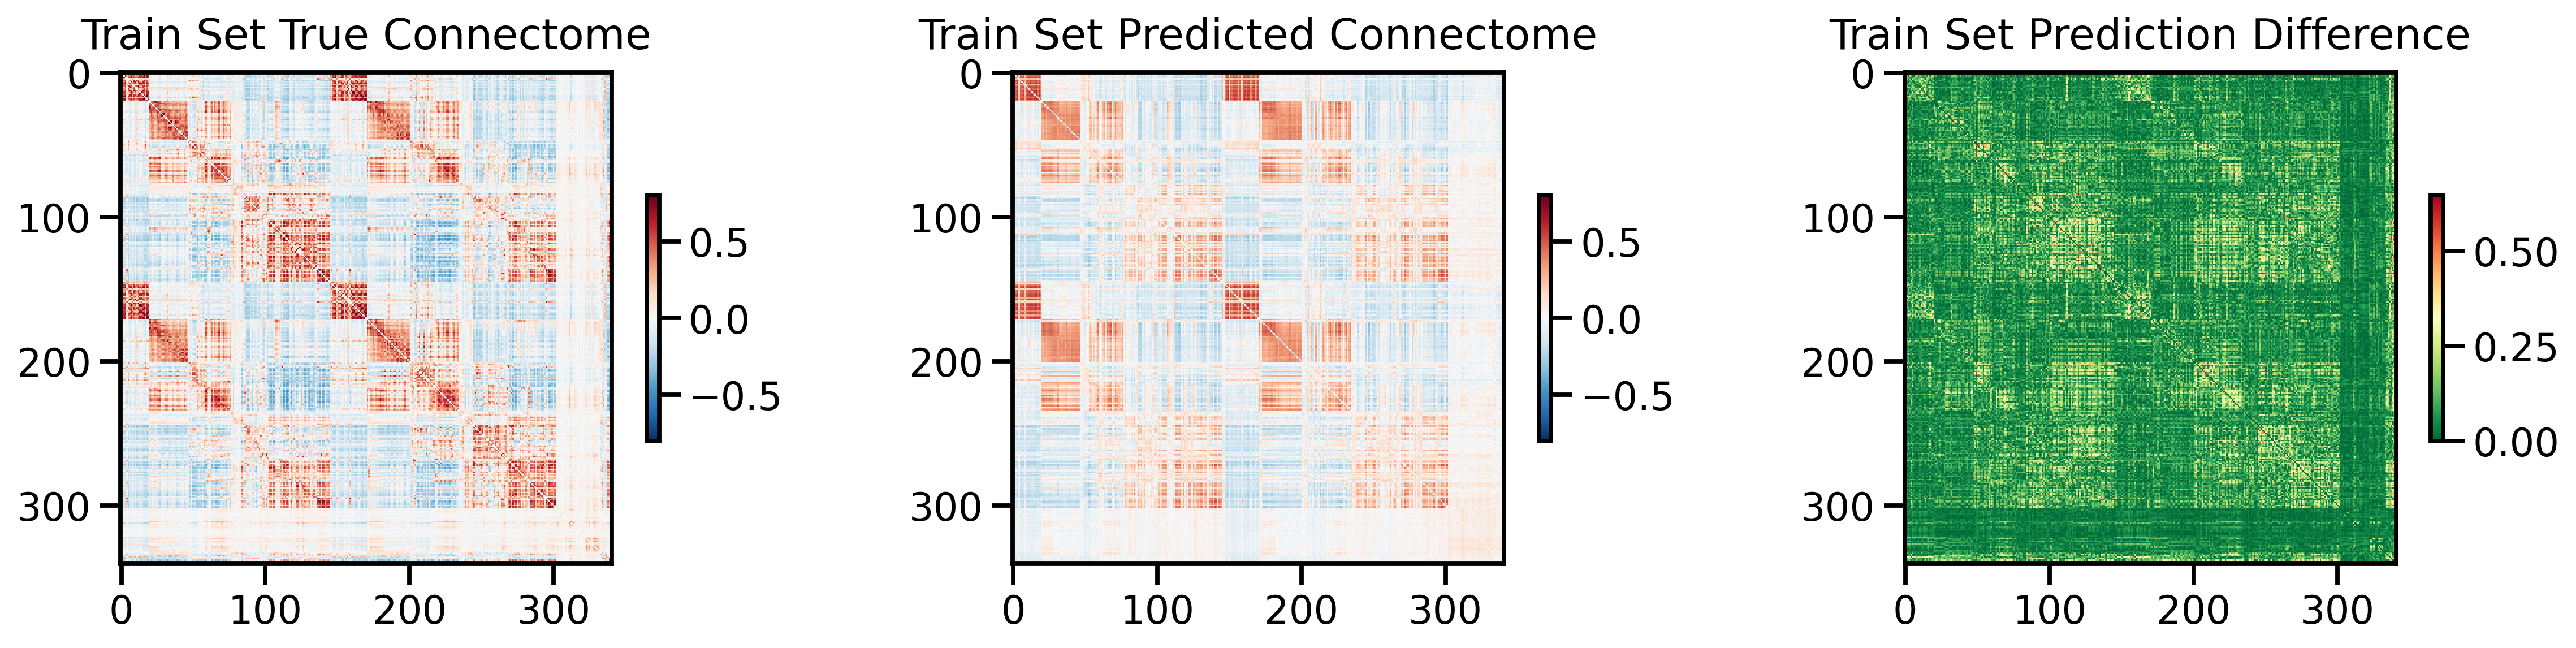

<Figure size 640x480 with 0 Axes>

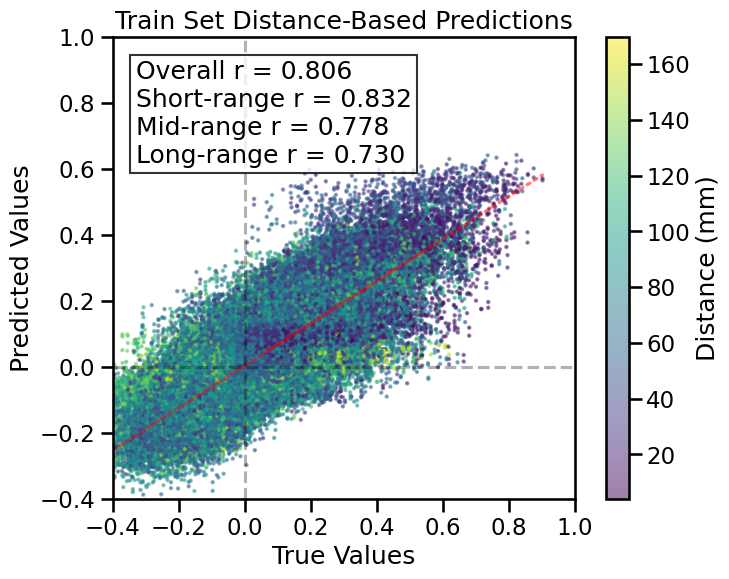

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

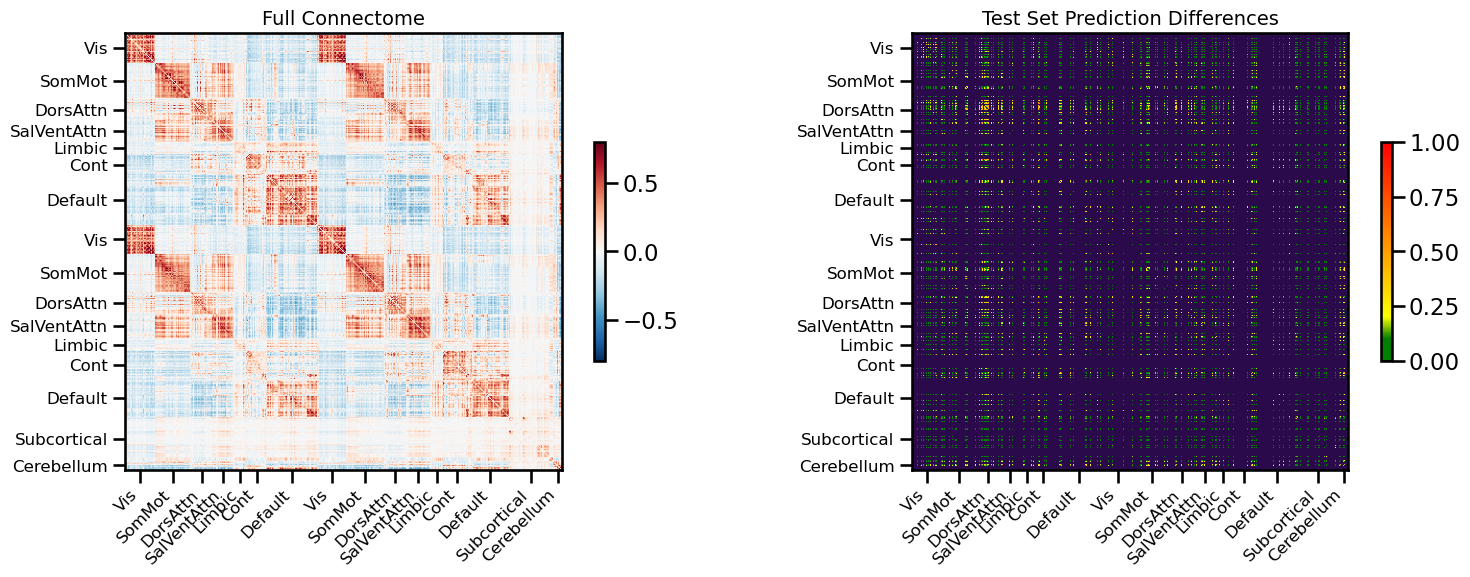

<Figure size 640x480 with 0 Axes>

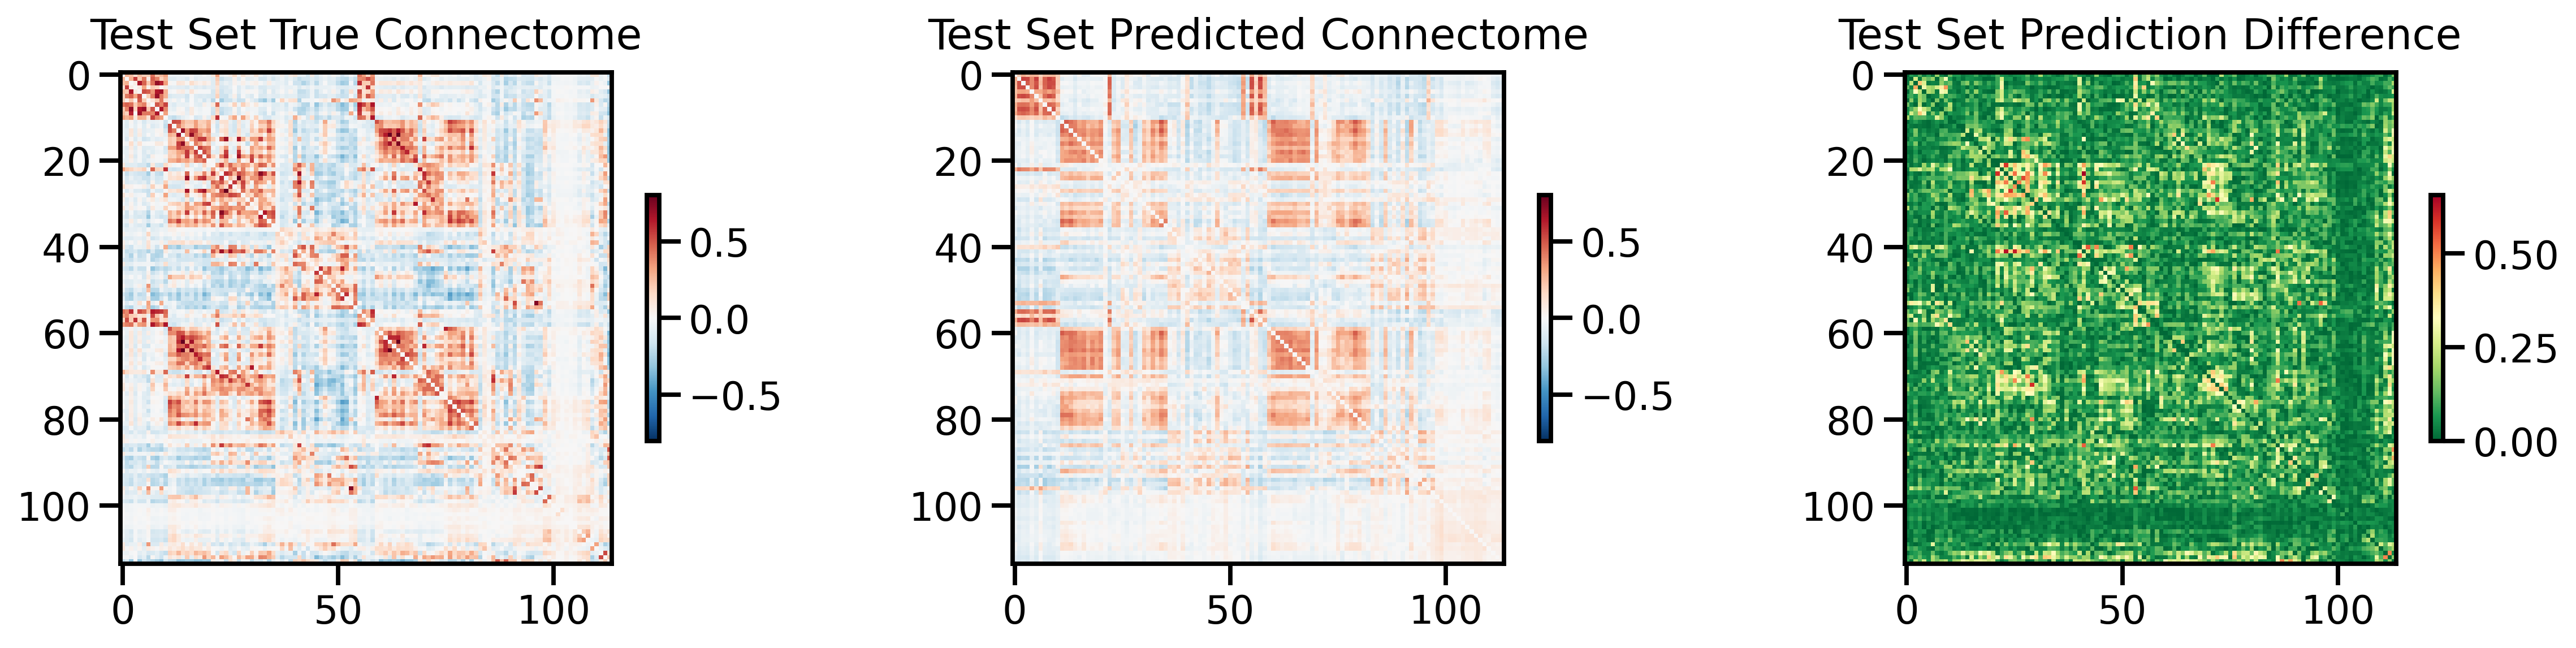

<Figure size 640x480 with 0 Axes>

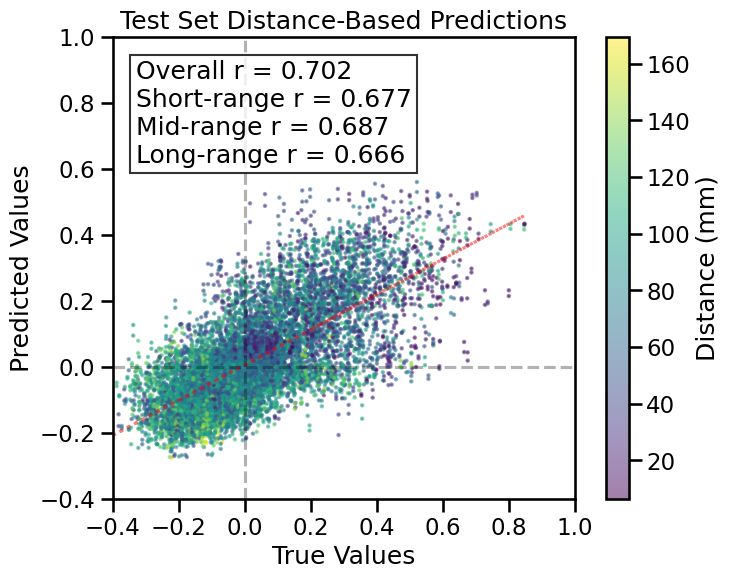

TRAIN METRICS
GLOBAL: mse=0.011874, mae=0.079843, r2=0.6495, pearson_r=0.8061, spearman_r=0.7772, geodesic_distance=26.4568
DISTANCE-BASED: short=0.8319, mid=0.7783, long=0.7298
HEMISPHERIC: left=0.8008, right=0.8259, inter=0.8051
CONNECTION STRENGTH: neg=0.0854, weak=0.7193, pos=0.4415
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.8301    0.8321
  Default       0.6949    0.7943
  SalVentAttn    0.8311    0.8417
  Limbic        0.8026    0.8570
  DorsAttn      0.8572    0.8640
  SomMot        0.8852    0.8618
  Vis           0.8685    0.8566
  Subcortical    0.7496    0.8022
  Cerebellum    0.9451    0.7842

TEST METRICS
GLOBAL: mse=0.016731, mae=0.094321, r2=0.4890, pearson_r=0.7021, spearman_r=0.6822, geodesic_distance=16.7820
DISTANCE-BASED: short=0.6769, mid=0.6866, long=0.6656
HEMISPHERIC: left=0.6579, right=0.7393, inter=0.7205
CONNECTION STRENGTH: neg=-0.0889, weak=0.6246, pos=0.2730
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 18.7%
RAM Usage: 10.0%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 108.28 seconds (1.80 minutes)


7408

<Figure size 640x480 with 0 Axes>

In [33]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_pca',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()